In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# analysis of walmart data from year 2020-24

In [5]:
import yfinance as yf

# Define the stock ticker and time period
ticker = "WMT"
start_date = "2020-01-01"
end_date = "2024-12-31"

# Download the data
wmt_data = yf.download(ticker, start=start_date, end=end_date)

# Save to a CSV file
wmt_data.to_csv("WMT_2020_2024.csv")

print("Data downloaded and saved as WMT_2020_2024.csv")


[*********************100%%**********************]  1 of 1 completed

Data downloaded and saved as WMT_2020_2024.csv


In [6]:
import pandas as pd

In [7]:
# Load the data
wmt_data = pd.read_csv("WMT_2020_2024.csv")

# Display the first few rows
print(wmt_data.head())


         Date       Open       High        Low      Close  Adj Close    Volume
0  2020-01-02  39.619999  39.963333  39.566666  39.646667  36.864079  20294700
1  2020-01-03  39.423332  39.596668  39.196667  39.296665  36.538631  16197600
2  2020-01-06  39.133331  39.363335  38.923332  39.216667  36.464256  19336500
3  2020-01-07  39.086666  39.173332  38.733334  38.853333  36.126423  20540700
4  2020-01-08  38.766666  38.910000  38.560001  38.720001  36.002449  17627400


In [8]:
# preprosessing step
# Convert 'Date' to datetime format
wmt_data['Date'] = pd.to_datetime(wmt_data['Date'])

# Set 'Date' as the index
wmt_data.set_index('Date', inplace=True)

# Display the summary of the DataFrame
print(wmt_data.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1164 entries, 2020-01-02 to 2024-08-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1164 non-null   float64
 1   High       1164 non-null   float64
 2   Low        1164 non-null   float64
 3   Close      1164 non-null   float64
 4   Adj Close  1164 non-null   float64
 5   Volume     1164 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 63.7 KB
None


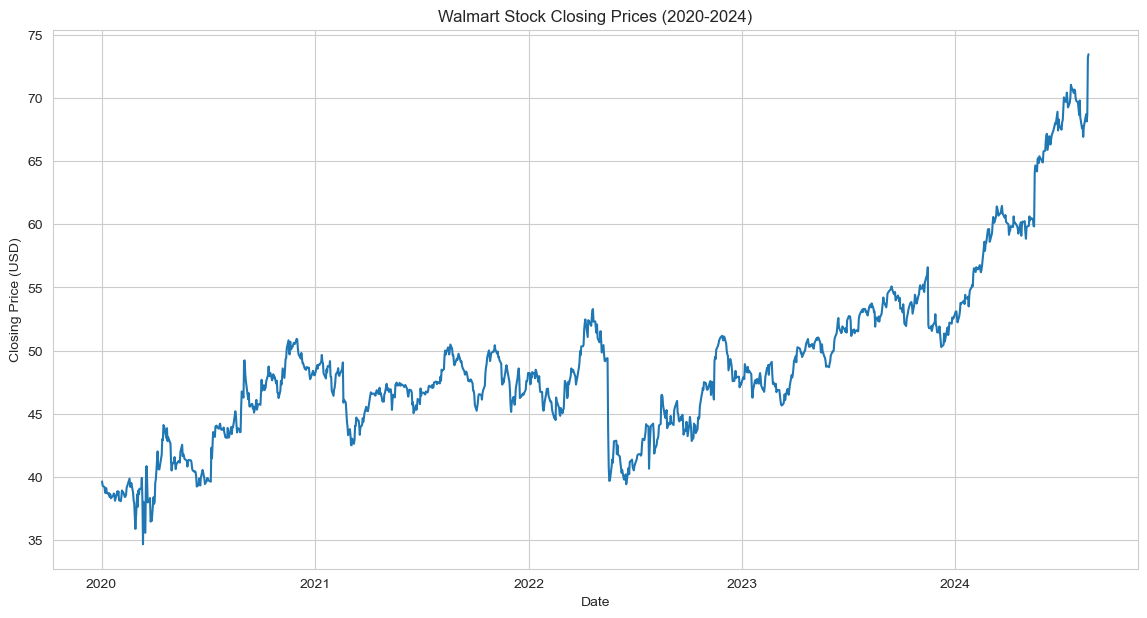

In [9]:
#line plot- Walmart Stock Closing Prices (2020-2024)
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Plot the closing price
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Close')
plt.title("Walmart Stock Closing Prices (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


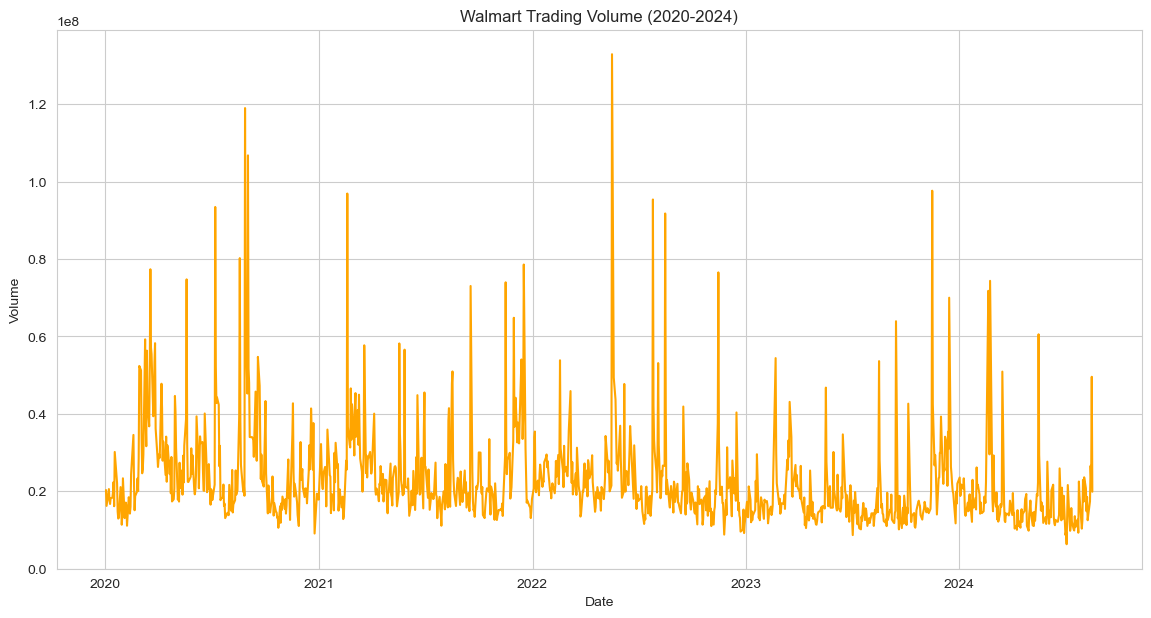

In [10]:
# Plot the trading volume
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Volume', color='orange')
plt.title("Walmart Trading Volume (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()


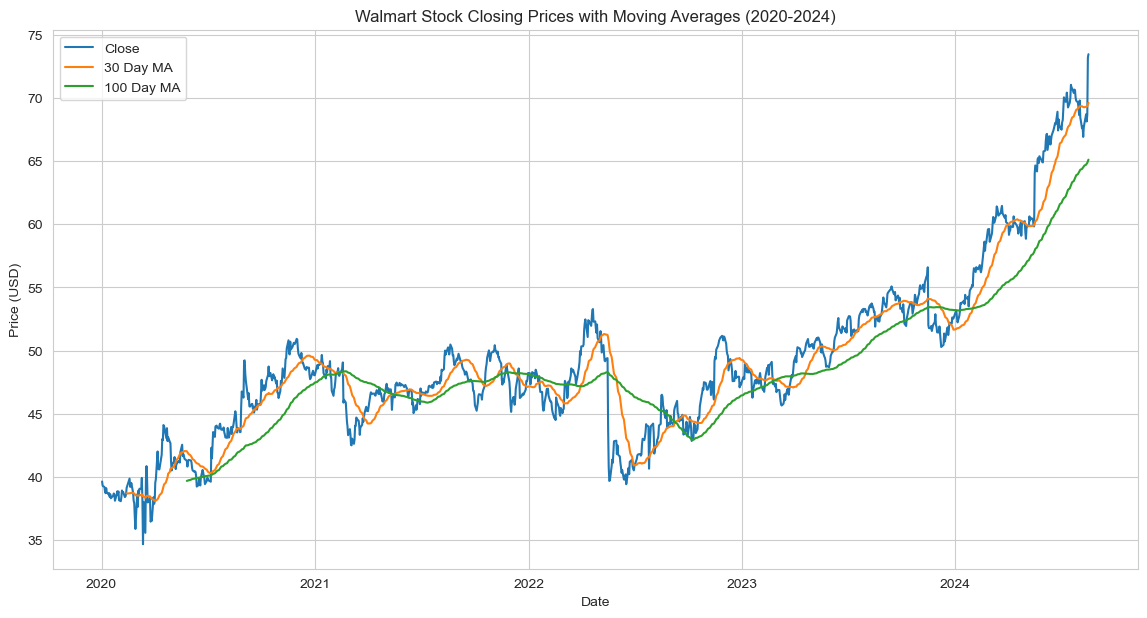

In [11]:
# Calculate moving averages
wmt_data['30 Day MA'] = wmt_data['Close'].rolling(window=30).mean()
wmt_data['100 Day MA'] = wmt_data['Close'].rolling(window=100).mean()

# Plot closing price with moving averages
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Close', label='Close')
sns.lineplot(data=wmt_data, x=wmt_data.index, y='30 Day MA', label='30 Day MA')
sns.lineplot(data=wmt_data, x=wmt_data.index, y='100 Day MA', label='100 Day MA')
plt.title("Walmart Stock Closing Prices with Moving Averages (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


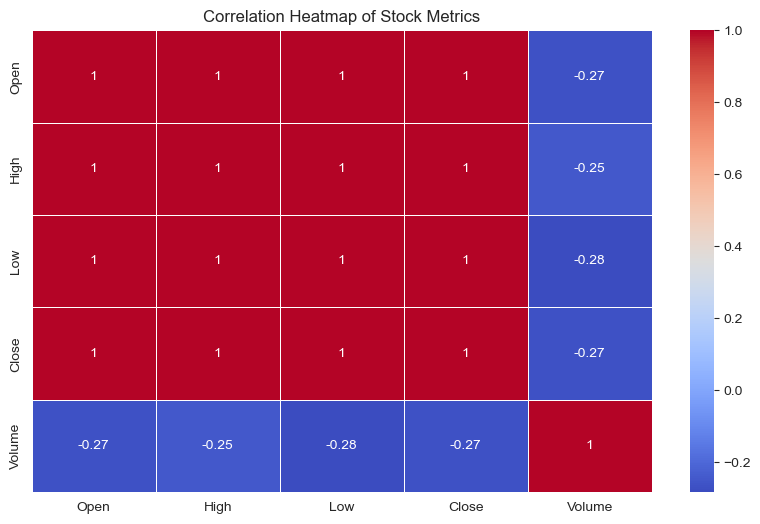

In [12]:
# Calculate the correlation matrix
correlation_matrix = wmt_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Stock Metrics")
plt.show()


In [13]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


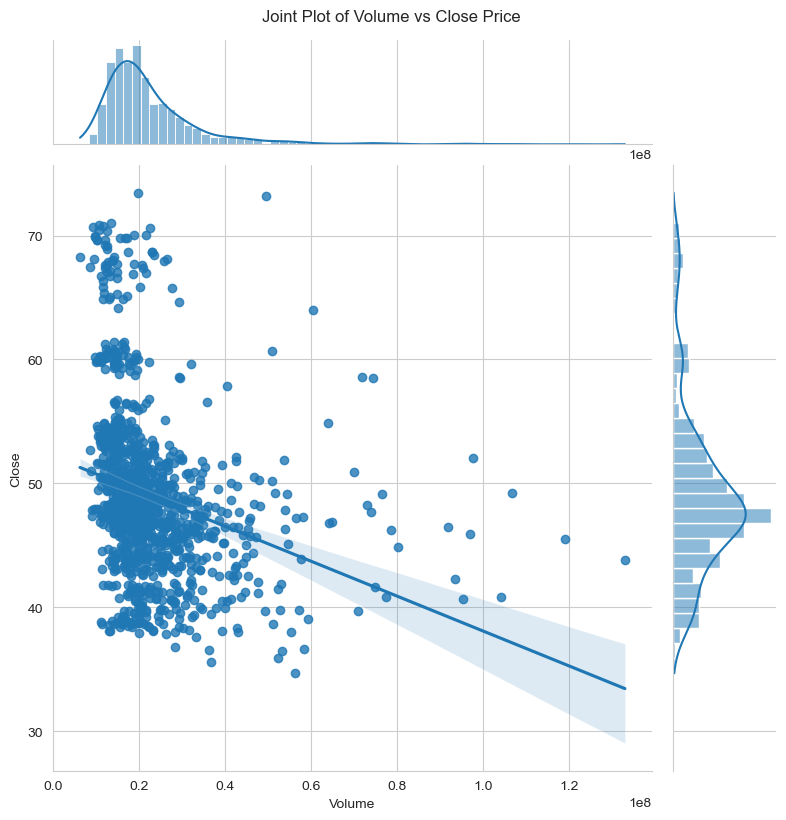

In [14]:
# Create a joint plot of Volume vs Close price
sns.jointplot(data=wmt_data, x='Volume', y='Close', kind='reg', height=8)
plt.suptitle("Joint Plot of Volume vs Close Price", y=1.02)
plt.show()


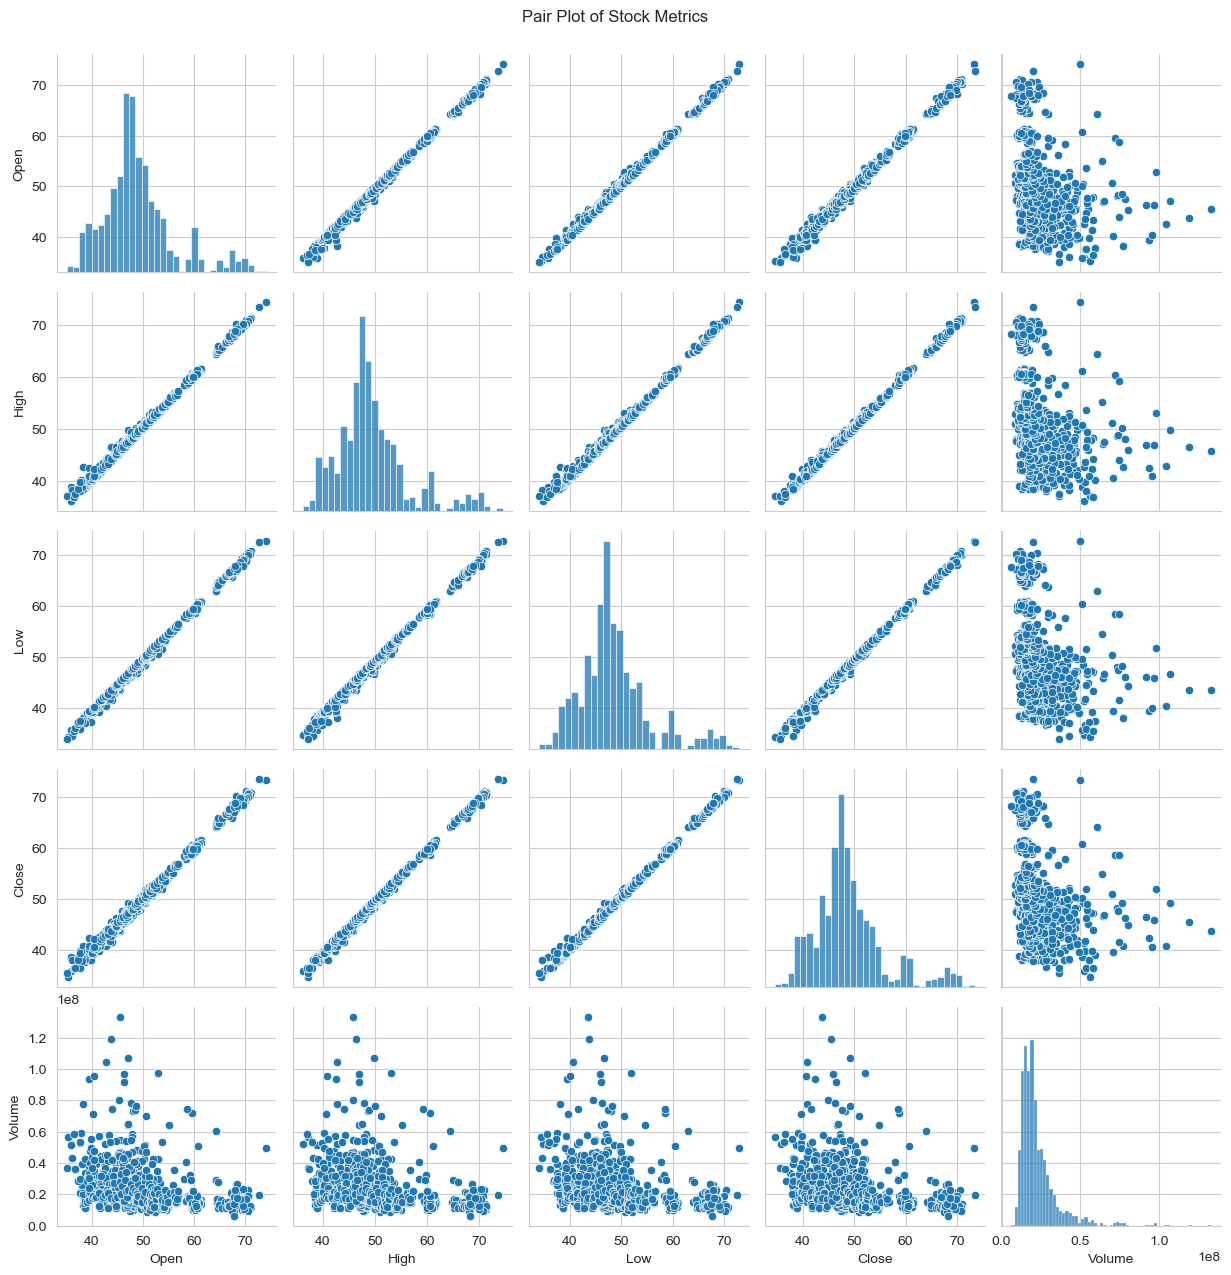

In [30]:
# Create a pair plot of stock metrics
sns.pairplot(wmt_data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle("Pair Plot of Stock Metrics", y=1.02)
plt.show()


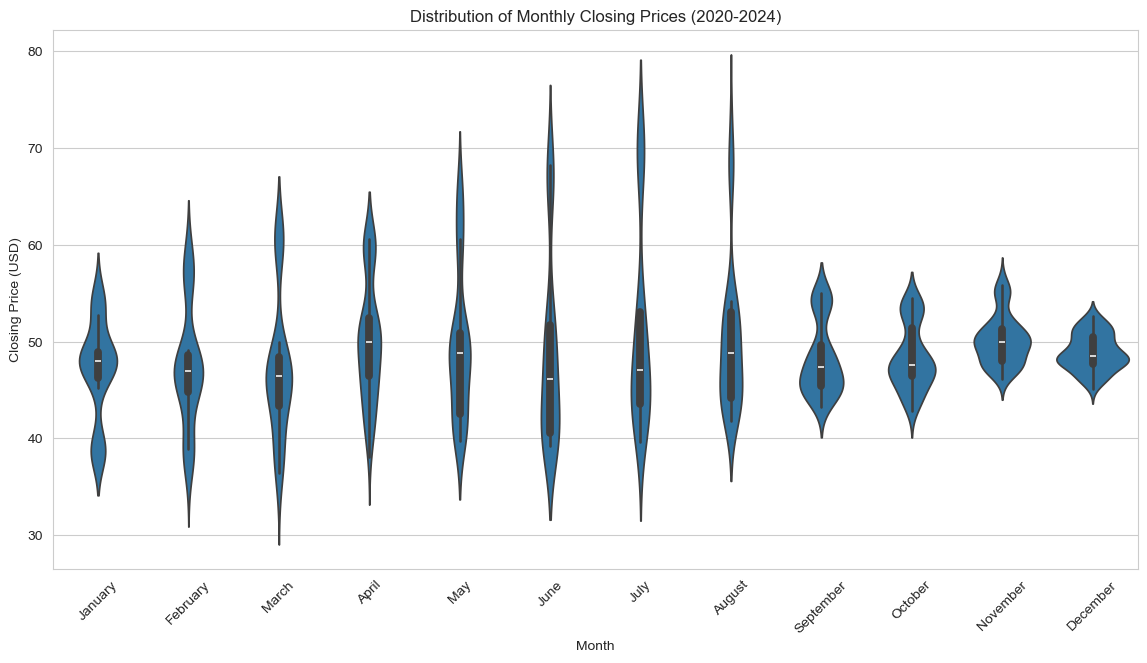

In [34]:
# Extract month from the index
wmt_data['Month'] = wmt_data.index.month_name()

# Create a violin plot of monthly closing prices
plt.figure(figsize=(14, 7))
sns.violinplot(data=wmt_data, x='Month', y='Close', order=['January', 'February', 'March', 'April', 'May', 
                                                           'June', 'July', 'August', 'September', 'October', 
                                                           'November', 'December'])
plt.title("Distribution of Monthly Closing Prices (2020-2024)")
plt.xlabel("Month")
plt.ylabel("Closing Price (USD)")
plt.xticks(rotation=45)
plt.show()


KeyError: '2020-03-15'

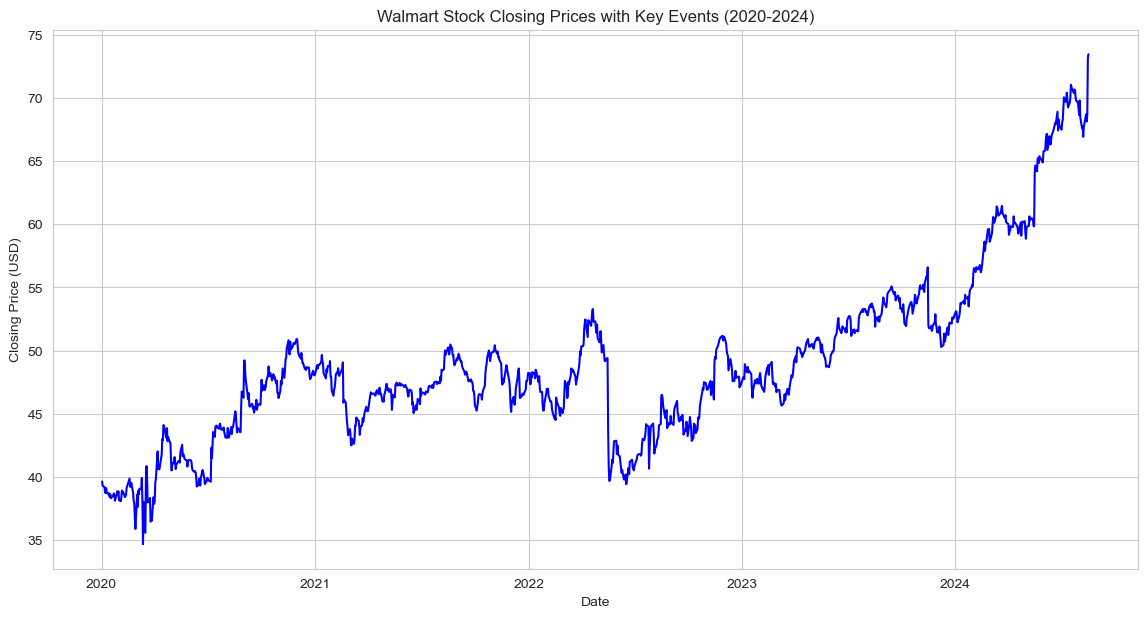

In [38]:
# Plot the closing prices and annotate significant events
plt.figure(figsize=(14, 7))
sns.lineplot(data=wmt_data, x=wmt_data.index, y='Close', color='blue')
plt.title("Walmart Stock Closing Prices with Key Events (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")

# Annotate key events (Example: COVID-19 impact, Quarterly reports)
plt.annotate('COVID-19 Market Crash', xy=('2020-03-15', wmt_data.loc['2020-03-15']['Close']),
             xytext=('2020-01-15', 160), arrowprops=dict(facecolor='red', shrink=0.05))

# Add more annotations as needed
plt.show()
